# DBSCAN
* 밀집도 기반의 군집 형성 알고리즘
* KMeans와 달리 K없이 군집 가능
* leaf부터 시작해서 최종 1개의 그룹을 형성할 때까지 그룹화(클러스터링)  

* 그룹화 조건 : eps:3, n:5
* 모든 클러스터링은 원의 반경(epsillon) : 3으로 동일하다
    * Center 노드 : 3개의 노드수
    * Border 노드 : 2개의 노드수 (1개 : 포인트노드, 1개 : Center 노드) -> 합류
    * Noise 노드 : 2개의 노드수 (2개 : 포인트노드)
    
    * 최종 : Center 노드 : 5개의 노드수 (3개의 노드수 + Border 노드)

In [18]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples

In [3]:
iris = datasets.load_iris()
cols = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
df = pd.DataFrame(iris.data, columns=cols)
df["target"]=iris.target
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X_feature = df[["Sepal length", "Sepal width"]]

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric="euclidean")
pred_cluster = dbscan.fit_predict(X_feature)
df["pred_cluster"] = pred_cluster
df["labels_"] = dbscan.labels_

In [15]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target,pred_cluster,labels_
0,5.1,3.5,1.4,0.2,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0


In [23]:
y_label_ = df["labels_"]
c_coef = silhouette_samples(X_feature, y_label_)
print(f"실루엣계수(각node별):{c_coef[:5]}")

# avg_score = np.mean(c_coef)
# print(avg_score:.5f)

avg_coef = silhouette_score(X_feature, y_label_)
print(f"실루엣계수(전체node평균):{avg_coef:.5f}")

실루엣계수(각node별):[0.59967189 0.62374371 0.59843141 0.58962059 0.57936575]
실루엣계수(전체node평균):0.43184


### 검증 : 교차테이블

In [24]:
y = df["target"]
tab = pd.crosstab(y, pred_cluster)
tab

col_0,-1,0
target,,
0,0,50
1,0,50
2,2,48


In [34]:
#군집화 실패 > X_feature 변경
X_feature = df[["Petal length", "Petal width"]]

In [38]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric="euclidean")
pred_cluster = dbscan.fit_predict(X_feature)
df["pred_cluster"] = pred_cluster
df["labels_"] = dbscan.labels_

In [39]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target,pred_cluster,labels_
0,5.1,3.5,1.4,0.2,0,0,0
1,4.9,3.0,1.4,0.2,0,0,0
2,4.7,3.2,1.3,0.2,0,0,0
3,4.6,3.1,1.5,0.2,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0


In [40]:
y = df["target"]
tab = pd.crosstab(y, pred_cluster)
tab

col_0,0,1
target,,
0,50,0
1,0,50
2,0,50


0.1 ------------------------------------------------------------ 
 col_0   -1   0
target        
0       33  17
1       50   0
2       50   0


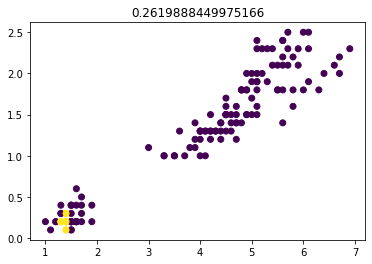

0.5 ------------------------------------------------------------ 
 col_0   -1   0   1
target            
0        0  50   0
1        1   0  49
2        5   0  45


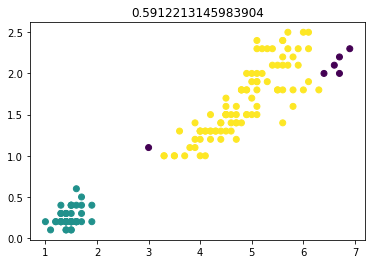

1 ------------------------------------------------------------ 
 col_0    0   1
target        
0       50   0
1        0  50
2        0  50


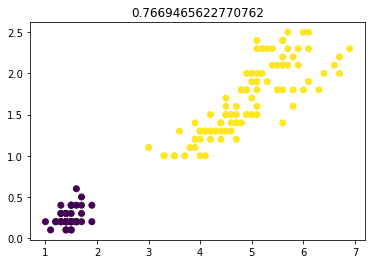

1.2 ------------------------------------------------------------ 
 col_0    0   1
target        
0       50   0
1        0  50
2        0  50


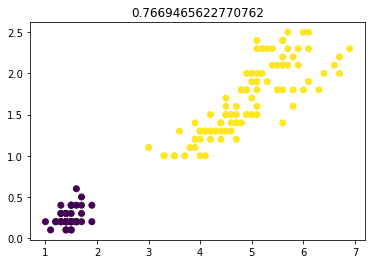

In [51]:
eps = [0.1, 0.5, 1, 1.2]
for e in eps:
    dbscan = DBSCAN(eps=e, min_samples=15, metric="euclidean")
    pred_cluster = dbscan.fit_predict(X_feature)
    tab = pd.crosstab(y, pred_cluster)
    
    print(e, "--"*30, "\n", tab)
    
    plt.scatter(df["Petal length"], df["Petal width"], c=pred_cluster)
    plt.title(silhouette_score(X_feature, dbscan.labels_))
    # coef == np.mean(Center노드 - 각 점들같의 거리) : 이 값이 0에 가까울수록 좋다
    # si == mean(Center노드 - 각 점들같의 거리) / max(거리) : 1 (정규분포)
    # : -1 : Noise 노드 (반경에 속하지 못하는 노드)
    plt.show()